In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [ ]:
class LinearRegression():
  def __init__(self, lr=1e-2, n_iters = 1e3):
    self.lr = lr
    self.n_iters = n_iters
    self.weights = None
    self.bias = None

  def fit(self, X, y):
    n_samples, n_features = X.shape

    # init parameters
    self.weights = np.random.randn(n_features)
    self.bias = 0

    #gradient descent
    for _ in range(self.n_iters):
      y_pred = np.dot(X, self.weights) + self.bias # (n_samples, n_features) @ (n_features) = (n_samples)

      # compute gradients
      dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
      db = (1 / n_samples) * np.sum(y_pred - y)

      # update parameters
      self.weights -= self.lr * dw
      self.bias -= self.lr * db

  def predict(self, x):
    return  np.dot(x, self.weights) + self.bias


In [ ]:
def r2_score(y_test, y_pred):
  corr_matrix = np.corrcoef(y_test, y_pred)
  corr = corr_matrix[0, 1]
  return corr**2

def MSE(y_test, y_pred):
  return np.mean((y_test - y_pred) ** 2)

In [ ]:
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
regressor = LinearRegression(lr=1e-2, n_iters = 1000)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

MSE: 325.7195603796226
Accuracy: 0.9291693410698004


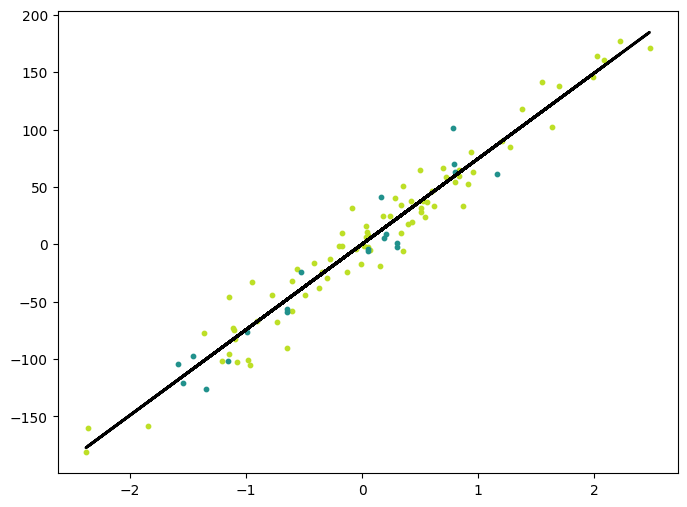

In [ ]:
mse = MSE(y_test, y_pred)
print("MSE:", mse)

accu = r2_score(y_test, y_pred)
print("Accuracy:", accu)

y_pred_line = regressor.predict(X)
cmap = plt.get_cmap("viridis")
fig = plt.figure(figsize=(8, 6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color="black", linewidth=2, label="Prediction")
plt.show()